# Advertisement CTR (Click-Through Rate) Prediction
By Dev Patel

In this logistic regression based project I will try to predict whether or not a particular internet user clicked on an Advertisement on a company website using NumPy, Pandas, Matplotlib, Seaborn, and SciKitLearn.

I will work on a fake advertising dataset which contains the following features:
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

**Getting the Data**

In [2]:
# Extracting the data from csv file

adv_data = pd.read_csv('advertising.csv')
adv_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
# Info of the data

adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
# Statistical description of the data

adv_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**Exploratory Data Analysis**

Text(0.5, 0, 'Age')

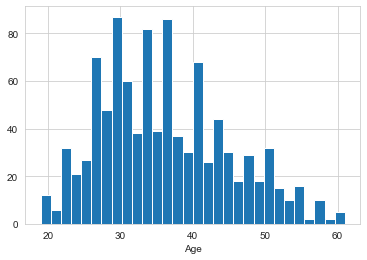

In [5]:
# Histogram of the 'Age' column

adv_data['Age'].hist(bins=30)
plt.xlabel('Age')

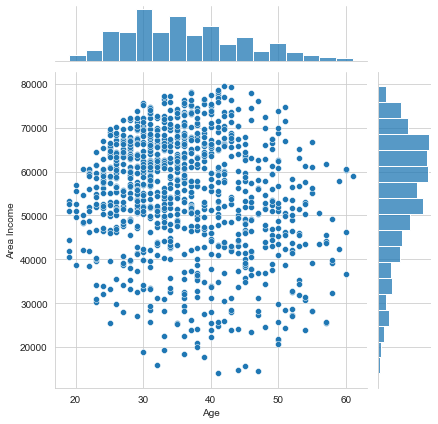

In [6]:
# Jointplot showing Area Income vs Age

sns.jointplot(data=adv_data, x='Age', y='Area Income')

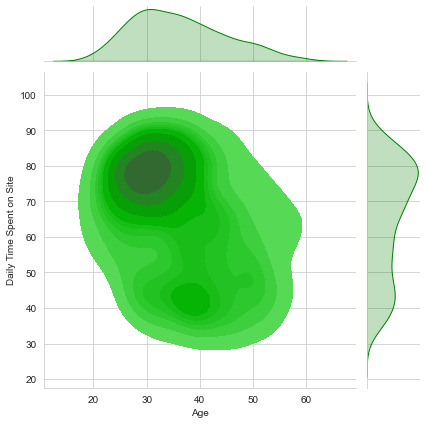

In [7]:
# Jointplot showing the kde distributions of Daily Time spent on site vs Age

sns.jointplot(data=adv_data, x='Age', y='Daily Time Spent on Site', color='green', kind='kde', fill=True);

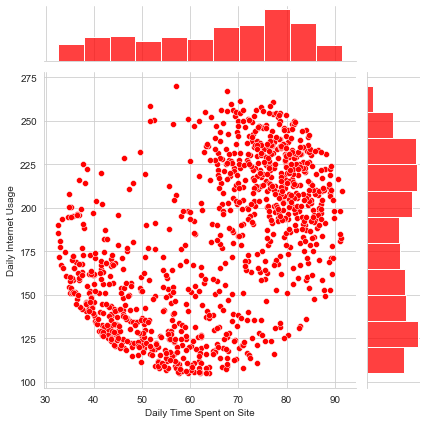

In [8]:
# Jointplot of Daily Time Spent on Site vs Daily Internet Usage

sns.jointplot(data=adv_data, x='Daily Time Spent on Site', y='Daily Internet Usage', color='red')

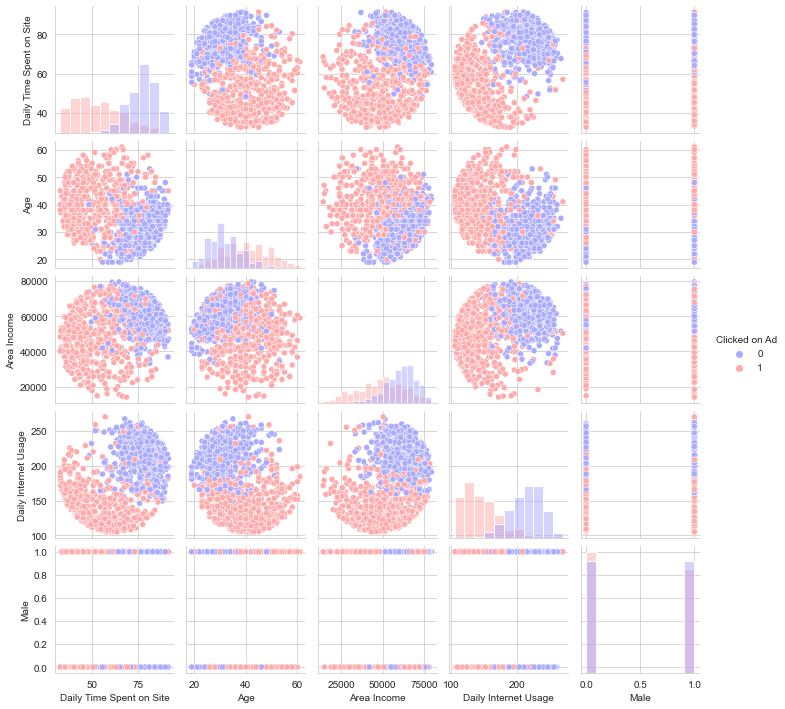

In [9]:
# Pairplot of adv_data with hue by 'Clicked on Ad' column

sns.pairplot(adv_data, hue='Clicked on Ad', diag_kind='hist', height=2, palette='bwr')

**Logistic Regression Model**

In [10]:
# Splitting the data in training and testing data

X = adv_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = adv_data['Clicked on Ad']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
# Training the model on training data

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Predicting from the model

predictions = logReg.predict(X_test)

In [13]:
# Evaluation the model

from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions)) # Confusion Matrix

[[149   8]
 [ 14 129]]


In [14]:
# Classification report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

